In [1]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.datasets import make_classification
from models.mcp import WrapperOOBBinaryConformalClassifier
from plotly_utils import efficiency_curve, reliability_curve, histogram, confusion_matrix, beta_pdf_with_cdf_fill
from sklearn.metrics import confusion_matrix as sklearn_confusion_matrix

In [2]:
# Gerar um conjunto de dados de classificação
X, y = make_classification(n_samples=100000, n_features=20, random_state=42)

In [3]:
# Dividir os dados em conjuntos de treinamento, calibração e teste
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
X_train, X_calib, y_train, y_calib = train_test_split(X_train, y_train, test_size=0.25, random_state=42)

In [ ]:
rf = RandomForestClassifier(random_state=42, oob_score=True, n_jobs=-1, class_weight="balanced")
rf.fit(X_train, y_train)

In [ ]:
clf = WrapperOOBBinaryConformalClassifier(rf)
clf.fit(y_train)

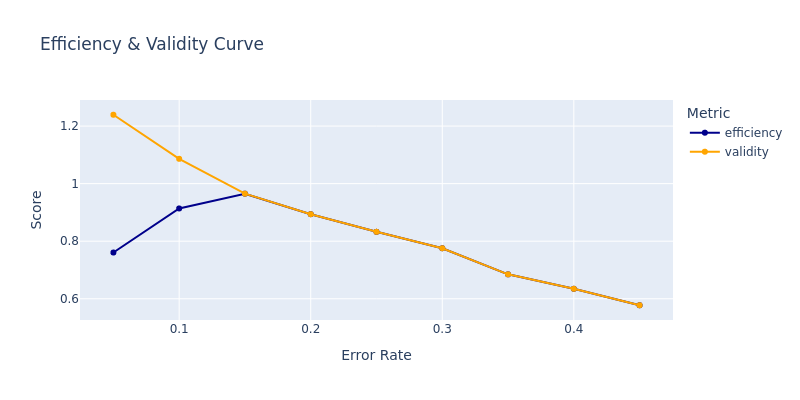

In [5]:
efficiency_curve(clf, X_test, "png")

In [6]:
clf.calibrate_alpha(X_calib, y_calib)


In [7]:
clf.alpha

0.1

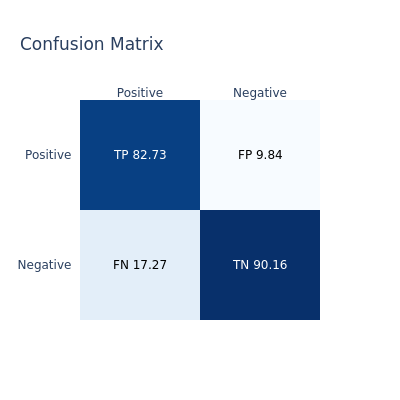

In [8]:
confusion_matrix(clf, X_test, y_test, fig_type="png")

Random Forest

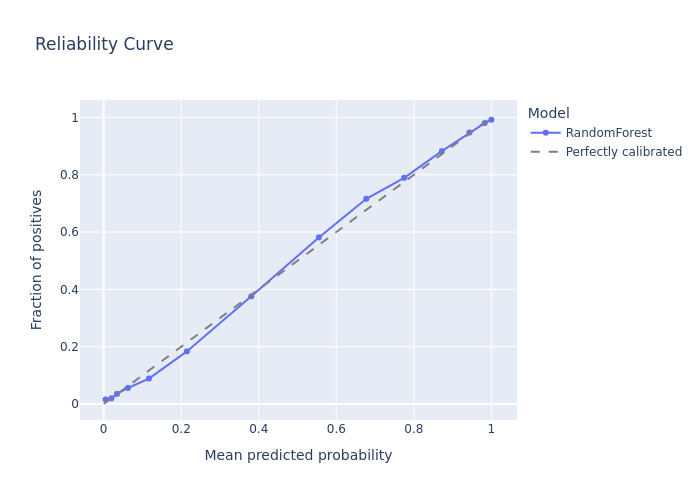

In [9]:
reliability_curve(clf.learner, X_test, y_test, 15,  "png")

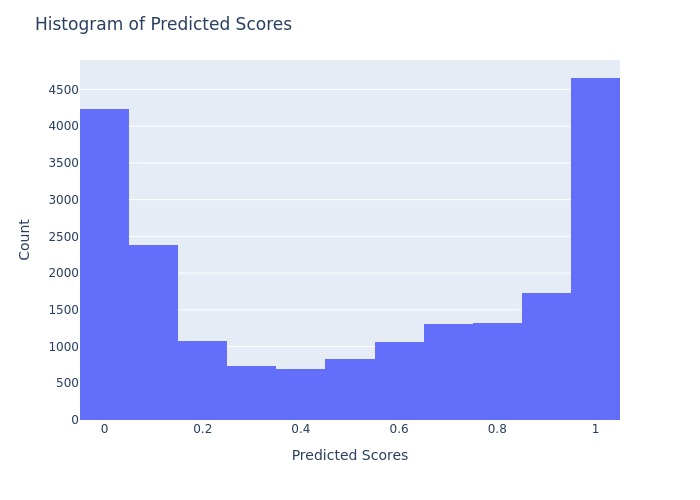

In [10]:
histogram(clf.learner, X_test, 15, "png")

Venn Abers

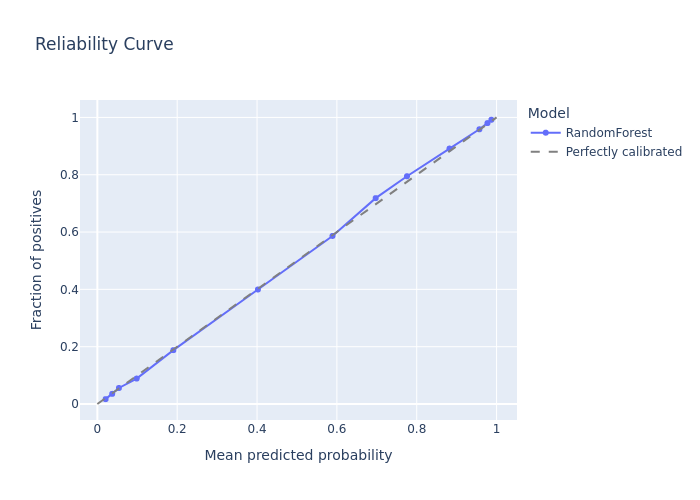

In [11]:
reliability_curve(clf, X_test, y_test, 15, "png")

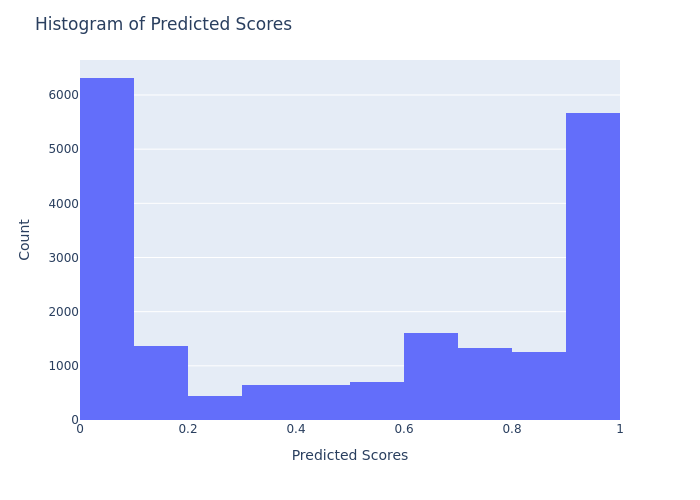

In [12]:
histogram(clf, X_test, 15, "png")

Alpha - 0.05

In [13]:
clf.evaluate(X_test, y_test, alpha=0.05)

,one_c,avg_c,empty,error,log_loss,brier_loss,ece,empirical_coverage,generalization,auc,precision,recall,alpha
0,0.761,1.239,0.0,0.044,0.299,0.091,0.007,1.0,0.001,0.945,0.943,0.691,0.05


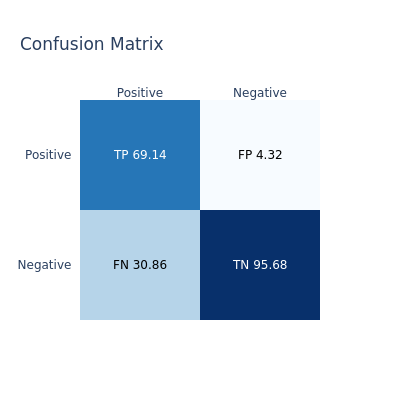

In [14]:
confusion_matrix(clf, X_test, y_test, alpha=0.05, fig_type="png")

Alpha - 0.10

In [15]:
clf.evaluate(X_test, y_test, alpha=0.10)

,one_c,avg_c,empty,error,log_loss,brier_loss,ece,empirical_coverage,generalization,auc,precision,recall,alpha
0,0.914,1.086,0.0,0.088,0.299,0.091,0.007,0.957,0.01,0.945,0.896,0.827,0.1


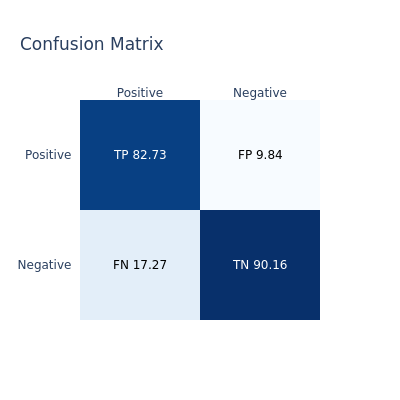

In [16]:
confusion_matrix(clf, X_test, y_test, alpha=0.10, fig_type="png")

In [17]:
tn, fp, fn, tp = sklearn_confusion_matrix(y_test, clf.predict(X_test)).ravel()

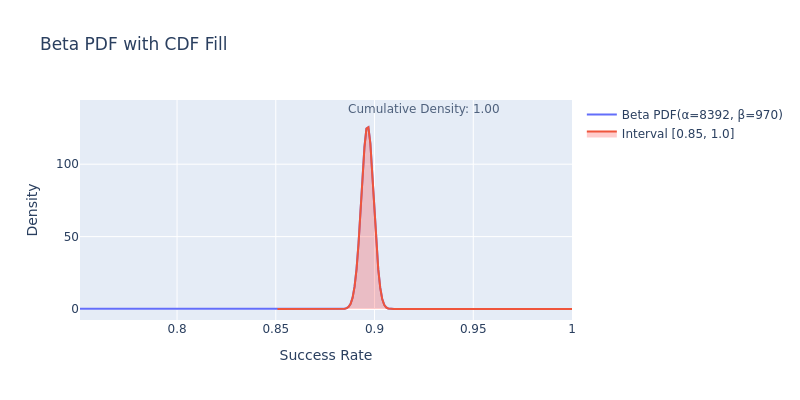

In [18]:
beta_pdf_with_cdf_fill(tp, fp, start=0.85, fig_type="png")

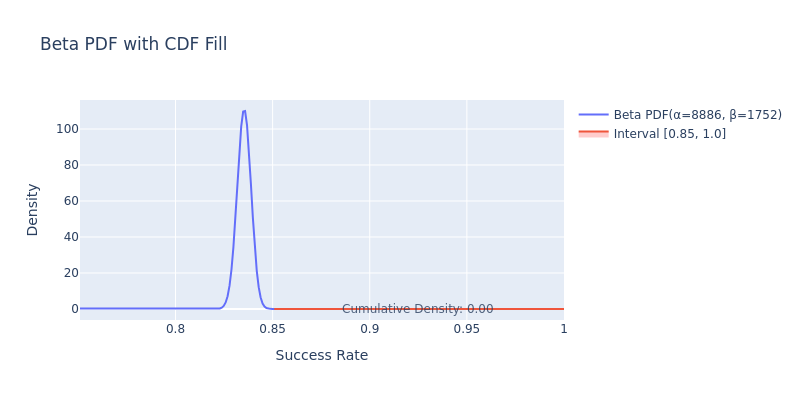

In [19]:
beta_pdf_with_cdf_fill(tn, fn, start=0.85, fig_type="png")